Ref.: https://www.kaggle.com/code/caesarmario/drug-classification-w-various-ml-models

Dataset ref.: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

# Problem statement

The dataset (https://www.kaggle.com/datasets/prathamtripathi/drug-classification) contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

# Objective of this notebook

Our objectives in this project:

1. Dataset exploration using various types of data visualization.

2. Build various ML models that can predict drug type.

The ML models used in this project are:

(i) Logistic regression, (ii) Support vector machine with linear kernel or support vector classification (SVM or SVC), (iii) K-Nearest neighbours (KNN), (iv) Naive Bayes classification, (v) Decision tree classification, (vi) Random forest classification.

# About the dataset

#### About this Dataset
Context
Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

#### Content
The target feature is
Drug type
The feature sets are:
Age
Sex
Blood Pressure Levels (BP)
Cholesterol Levels
Na to Potassium Ration

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Import dataset

In [6]:
drug_df = pd.read_csv('drug200.csv')

drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Splitting dataset into matrix of features ($X$) and dependent variable vector ($y$)

In [7]:
# Matrix of features
X = drug_df.iloc[:, :-1].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [9]:
X.shape

(200, 5)

In [8]:
# Dependent variable vector
y = drug_df.iloc[:, -1].values
y

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugA', 'drugC', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY',
       'drugX', 'drugB', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'Dru

In [10]:
y.shape

(200,)

# Data pre-processing

In [ ]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 200 entries, 0 to 199

Data columns (total 6 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   Age          200 non-null    int64  

 1   Sex          200 non-null    object 

 2   BP           200 non-null    object 

 3   Cholesterol  200 non-null    object 

 4   Na_to_K      200 non-null    float64

 5   Drug         200 non-null    object 

dtypes: float64(1), int64(1), object(4)

memory usage: 9.5+ KB


In [ ]:
# Checking the missing values

drug_df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


The dataset has no missing values. Great!

# Data analysis

The dataset has 4 categorical variables (or attributes): Sex, BP, Cholesterol, Drug and 2 numerical variables (or attributes): Age, Na_to_K.

## Histogram of categorical variables

In [ ]:
drug_df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
drug_df['Sex'].value_counts()

,count
Sex,
M,104
F,96


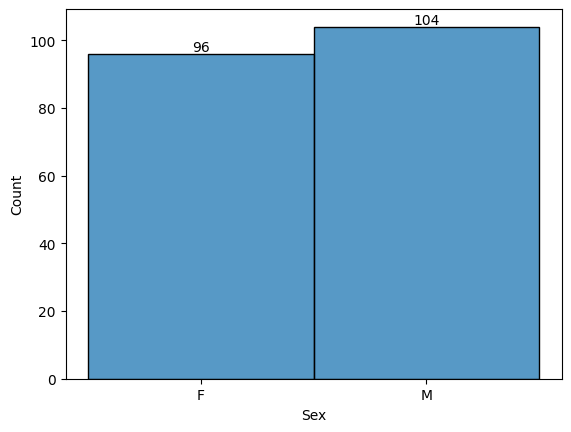

In [ ]:
ax = sns.histplot(drug_df['Sex'])
ax.bar_label(ax.containers[0]);   # This line add text labels with each bar’s total count or frequency.

In [ ]:
drug_df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
drug_df['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


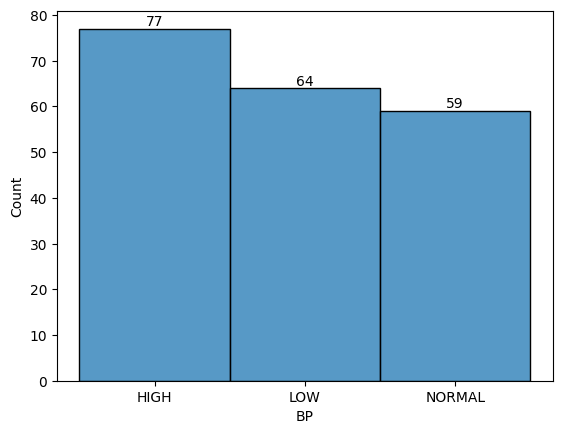

In [ ]:
ax = sns.histplot(drug_df['BP'])
ax.bar_label(ax.containers[0]);   # This line add text labels with each bar’s total count or frequency.

In [ ]:
drug_df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
drug_df['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


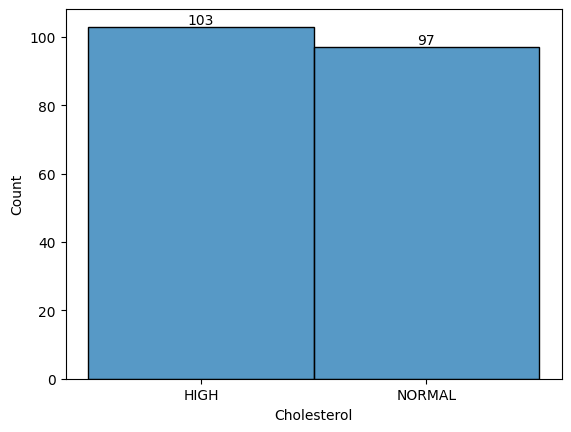

In [ ]:
ax = sns.histplot(drug_df['Cholesterol'])
ax.bar_label(ax.containers[0]);   # This line add text labels with each bar’s total count or frequency.

In [ ]:
drug_df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
drug_df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


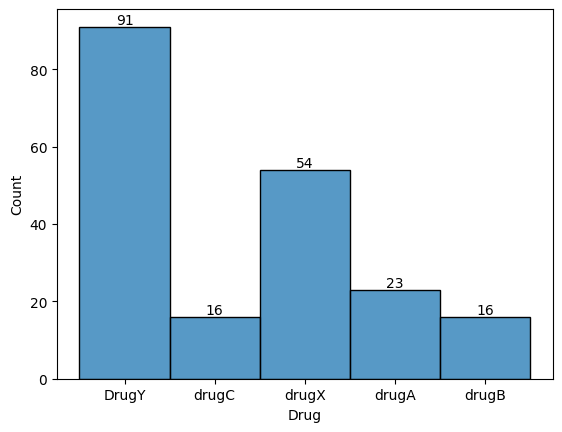

In [ ]:
ax = sns.histplot(drug_df['Drug'])
ax.bar_label(ax.containers[0]);   # This line add text labels with each bar’s total count or frequency.

## Descriptive statistices of numerical variables

In [ ]:
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Skewness of numerical variables

In [ ]:
# Compute skewness of numerical variables

print(drug_df['Age'].skew())

print(drug_df['Na_to_K'].skew())

0.03030835703000607

1.039341186028881


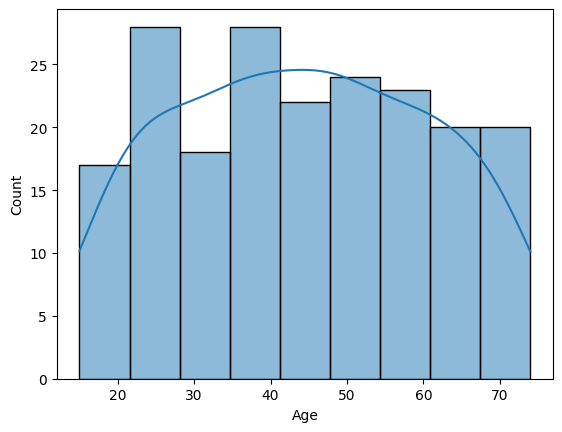

In [ ]:
sns.histplot(drug_df['Age'], kde = True);   # kde = True shows the distribtution line also.

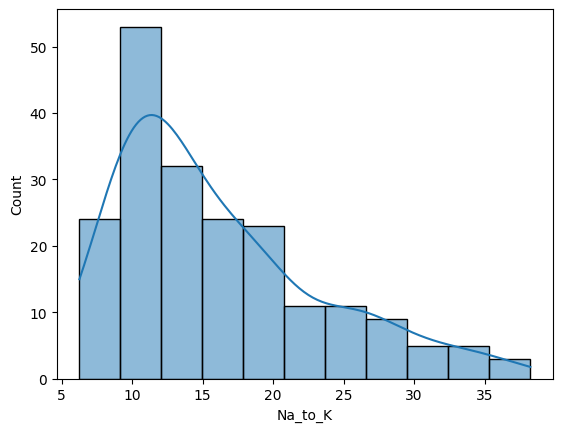

In [ ]:
sns.histplot(drug_df['Na_to_K'], kde = True);   # kde = True shows the distribtution line also.

So, distribution of 'Age' is symmetric (skewness is close to zero), whereas distribtuion of 'Na_to_K' is positively skewed or right skewed.

## 'Drug' distribution based on 'Sex' type

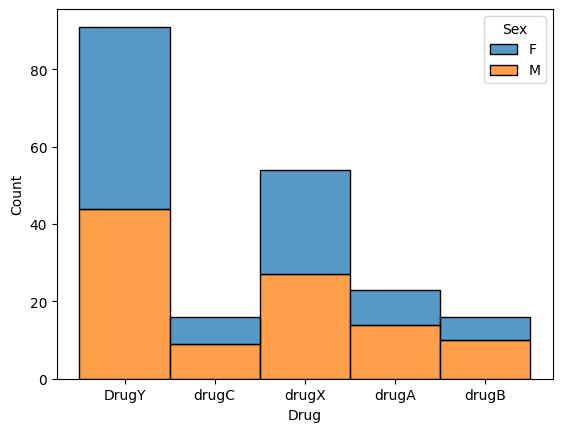

In [ ]:
sns.histplot(data = drug_df, x = 'Drug', hue = 'Sex', multiple = 'stack');

## 'BP' distribution based on 'Cholesterol' level

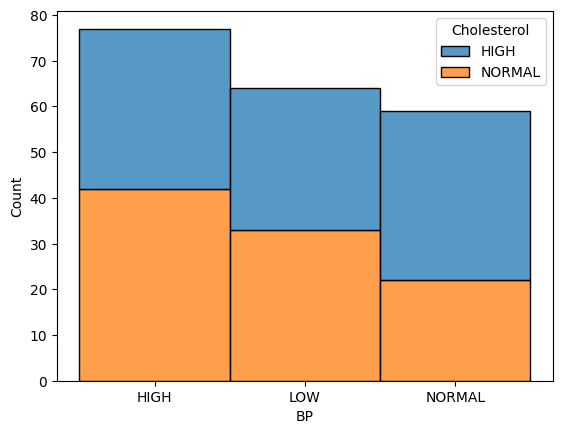

In [ ]:
sns.histplot(data = drug_df, x = 'BP', hue = 'Cholesterol', multiple = 'stack');

The group of "normal BP" patietns has *more* "high cholesterol" persons!!

## 'Na_to_K' distribution based on 'Sex' and 'Age'

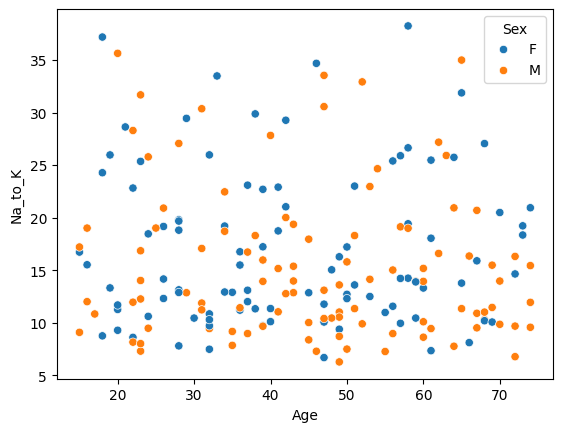

In [ ]:
sns.scatterplot(data = drug_df, x = 'Age', y = 'Na_to_K', hue = 'Sex');

## Correlaton between numerical features

There are two numerical features 'Age' and 'Na_to_K'. Pandas scatter_matrix function give scatter plots between every numerical feature against every numerical feature.

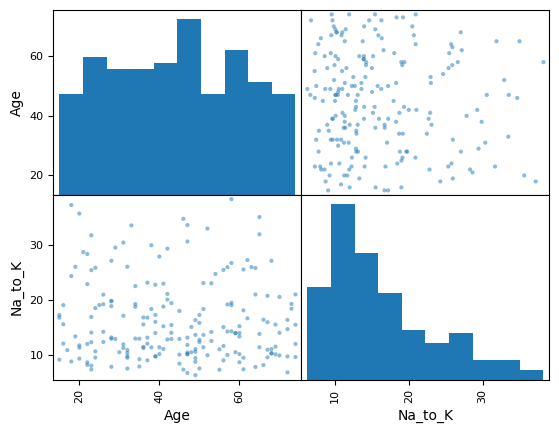

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(drug_df[['Age', 'Na_to_K']]);

# Encoding categorical variables

Transfomration or encoding of categorical variables/columns into numerical variables/columns is importat as ML algorithms can understand only numerical data. Encoding can be done in various ways: *ordinal encoding*, *label encoding* and *one hot encoding*. Encoding categorical variables into numerical variables can be done using **`scikit-learn`** classes. Also one hot encoding can be done in much simpler way using **`pandas get_dummies()`** function.

In [11]:
# One hot encoding using scikit-learn

# To do One Hot Encoding on the feature columns, we use two classes: (i) ColumnTransformer from the
# sklearn.compose moduleand and (ii) OneHotEncoder from the sklearn.preprocessing module.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder = 'passthrough')   # ct is the object of the ColumnTransformer class. Here we apply OneHotEncoding on the column_index = [1, 2, 3] i.e., 'Sex', 'BP' and 'Cholesterol' columns. The remaining columns that are not specified in the transformer (here OneHotEncoder()) are kept unchanged using the remainder = 'passthrough' argument.
X = ct.fit_transform(X)   # Replace or update the old X with the transformed X.
X

array([[1.0, 0.0, 1.0, ..., 0.0, 23, 25.355],
       [0.0, 1.0, 0.0, ..., 0.0, 47, 13.093],
       [0.0, 1.0, 0.0, ..., 0.0, 47, 10.114],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 52, 9.894],
       [0.0, 1.0, 0.0, ..., 1.0, 23, 14.02],
       [1.0, 0.0, 0.0, ..., 1.0, 40, 11.349]], dtype=object)

In [12]:
X[0:5, :]

array([[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 23, 25.355],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 47, 13.093],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 47, 10.114],
       [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 28, 7.798],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 61, 18.043]], dtype=object)

In [13]:
X.shape

(200, 9)

We see that, now, in the matrix of features $X$, only the mumerical features 'Age' and 'Na_to_K' have their original values and the categorical features 'Sex', 'BP' and 'Cholesterol' have encoded using OneHotEncoder so unique values of these categorical features transforemd into vectors. Thus total number of columns in one hot encoded $X$ is = 2 (for 'Age' and 'Na_to_K') + 2 (for 2 unique values of Sex: M and F) + 3 (for 3 unique values of 'BP': High, Normal and Low) + 2 (for 3 unique values of 'Cholesterol': High and Normal) = 9.

# Splitting dataset into train and test sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 9)

(150,)

(50, 9)

(50,)


# Feature scaling

In [16]:
X_train[:, 7]   # This slicing returns a 1D array for slicing all the rows but only one column with its index.

array([28, 53, 18, 56, 22, 33, 18, 30, 73, 65, 52, 58, 59, 32, 72, 29, 68,
       21, 67, 51, 69, 62, 35, 45, 39, 50, 23, 50, 49, 64, 47, 37, 51, 56,
       72, 67, 47, 34, 55, 52, 23, 47, 46, 41, 16, 39, 73, 66, 42, 35, 59,
       23, 58, 23, 56, 50, 36, 60, 57, 58, 18, 28, 23, 59, 74, 57, 48, 70,
       74, 57, 16, 19, 22, 62, 31, 36, 28, 67, 16, 23, 49, 54, 47, 15, 49,
       45, 31, 41, 40, 34, 61, 28, 46, 40, 68, 47, 28, 43, 50, 37, 49, 41,
       43, 39, 24, 24, 53, 47, 53, 39, 20, 68, 74, 58, 35, 48, 49, 60, 20,
       26, 45, 15, 32, 32, 51, 61, 72, 24, 26, 28, 38, 64, 65, 42, 58, 15,
       60, 49, 37, 70, 69, 32, 63, 43, 56, 17, 72, 40, 68, 39],
      dtype=object)

In [17]:
X_train[:, 7].shape

(150,)

In [18]:
X_train[:, [7]]   # This slicing returns a 2D array for slicing all the rows but only one column with its index in a list.

array([[28],
       [53],
       [18],
       [56],
       [22],
       [33],
       [18],
       [30],
       [73],
       [65],
       [52],
       [58],
       [59],
       [32],
       [72],
       [29],
       [68],
       [21],
       [67],
       [51],
       [69],
       [62],
       [35],
       [45],
       [39],
       [50],
       [23],
       [50],
       [49],
       [64],
       [47],
       [37],
       [51],
       [56],
       [72],
       [67],
       [47],
       [34],
       [55],
       [52],
       [23],
       [47],
       [46],
       [41],
       [16],
       [39],
       [73],
       [66],
       [42],
       [35],
       [59],
       [23],
       [58],
       [23],
       [56],
       [50],
       [36],
       [60],
       [57],
       [58],
       [18],
       [28],
       [23],
       [59],
       [74],
       [57],
       [48],
       [70],
       [74],
       [57],
       [16],
       [19],
       [22],
       [62],
       [31],
       [36],
       [28],

In [19]:
X_train[:, [7]].shape

(150, 1)

In [20]:
# To slice all the rows but multiple columns, mention column indices within a list.
X_train[:, [7, 8]]   # It clearly returns a 2D array as the column indices are given in a list. Here I give the indices of the 'Age' and 'Na_to_K' columns.

array([[28, 19.675],
       [53, 12.495],
       [18, 37.188],
       [56, 25.395],
       [22, 8.151],
       [33, 33.486],
       [18, 8.75],
       [30, 10.443],
       [73, 19.221],
       [65, 11.34],
       [52, 32.922],
       [58, 38.247],
       [59, 13.884],
       [32, 25.974],
       [72, 14.642],
       [29, 29.45],
       [68, 10.189],
       [21, 28.632],
       [67, 10.898],
       [51, 13.597],
       [69, 10.065],
       [62, 16.594],
       [35, 12.894],
       [45, 12.854],
       [39, 9.664],
       [50, 17.211],
       [23, 16.85],
       [50, 12.703],
       [49, 9.381],
       [64, 25.741],
       [47, 10.403],
       [37, 13.091],
       [51, 11.343],
       [56, 11.567],
       [72, 9.677],
       [67, 20.693],
       [47, 10.114],
       [34, 18.703],
       [55, 10.977],
       [52, 9.894],
       [23, 12.26],
       [47, 11.767],
       [46, 34.686],
       [41, 22.905],
       [16, 12.006],
       [39, 15.969],
       [73, 18.348],
       [66, 16.347],
   

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [7, 8]] = sc.fit_transform(X_train[:, [7, 8]])   # Here 7th and 8th columns (i.e., Age and Na_to_K which are numerical columns) of the X_train are first fitted (i.e., computed mean and standard deviation of the mentioned columns separately) and then transformed or standardized: z = (x-mu)/sigma. Finally these columns have been replaced with the standardized values.
X_test[:, [7, 8]] = sc.transform(X_test[:, [7, 8]])   # Here the same as above. But the mu and sigma are computed from corresponding columns of the X_train (mu and sigma are NOT computed from the corresponding columns of the X_test).

In [22]:
X_train

# Now we see that the 7th and the 8th columns (i.e., Age and Na_to_K) are standardized with the corresponding mu and sigma.

# Also, the categorical features are moved to left and after them numerical columns are written in the right.

array([[1.0, 0.0, 0.0, ..., 0.0, -1.0211560170051956, 0.5063401903884647],
       [1.0, 0.0, 1.0, ..., 1.0, 0.47995533688327296,
        -0.4868109837351762],
       [1.0, 0.0, 1.0, ..., 0.0, -1.621600558560583, 2.9287714595287597],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, -0.3006225671387307,
        -0.8176769459223276],
       [0.0, 1.0, 0.0, ..., 0.0, 1.3806221492163542, -0.7916724304995916],
       [1.0, 0.0, 0.0, ..., 1.0, -0.3606670212942695,
        0.16745155854961802]], dtype=object)

In [23]:
X_test

# Now we see that the 7th and the 8th columns (i.e., Age and Na_to_K) are standardized with the corresponding mu and sigma.

array([[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.3213782877828895,
        -1.2056698489051705],
       [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, -1.0211560170051956,
        -0.4336953777653324],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, -0.1805336588276532,
        0.553092989393171],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, -1.5015116502495056,
        2.714510851072281],
       [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, -1.2012893794718118,
        0.41449445506560967],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, -1.5015116502495056,
        -0.5987133931872687],
       [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, -1.3814227419384282,
        -1.0246064941798438],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, -0.48075592960534697,
        -0.5544503882123989],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, -0.12048920467211448,
        -0.08830561707080167],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.6000442451943505,
        -1.21078775885539],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, -1.2613338336273507,


# Train ML models on the training set

Now we are ready to build and train various machine learning (ML) models on the training dataset. In the following we will build and train ML models, one for each subsection. From one ML model to another, only one code cell, in which we build and train the ML model, will change. The rest will be completely unchanged.

## Logistic regression

### Build and Train the model

In [55]:
# Training ML model on the training set

from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(random_state = 0)
log_reg_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Cross validation
K-fold cross validation means spliting the training set into K folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [89]:
# Cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg_classifier, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.9 , 0.88, 0.9 ])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=14.

  warnings.warn(


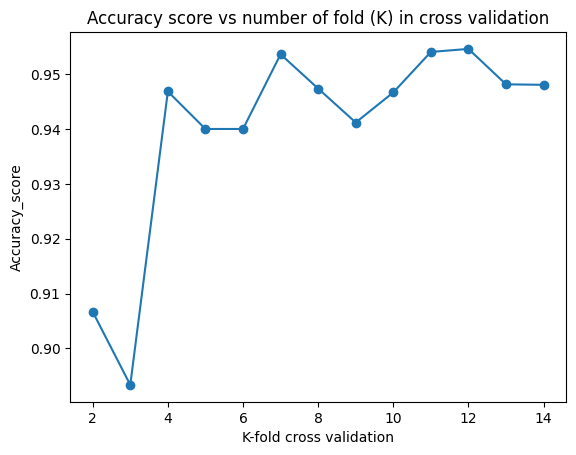

In [76]:
# Mean cross validation score vs number of folds in cross validation
from sklearn.model_selection import cross_val_score

mean_cv_score = []

for i in range(2, 15):
    cv_score = cross_val_score(log_reg_classifier, X_train, y_train, cv = i, scoring = 'accuracy')
    mean_cv_score.append(np.mean(cv_score))

plt.plot(range(2, 15), mean_cv_score, '-o')
plt.xlabel('K-fold cross validation')
plt.ylabel('Accuracy_score')
plt.title('Accuracy score vs number of fold (K) in cross validation')
plt.show()

#### Confusion matrix and Error matrix and their image reperentations
**Ref. of image presentations**: Aurelien Geron's book on Hands on Machine Learning.

In [97]:
# Cross validation predict and confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg_classifier, X_train, y_train, cv = 3)
confusion_matrix(y_train, y_train_pred)

array([[60,  1,  2,  1,  2],
       [ 0, 14,  4,  0,  0],
       [ 1,  2, 12,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 2,  0,  1,  0, 35]])

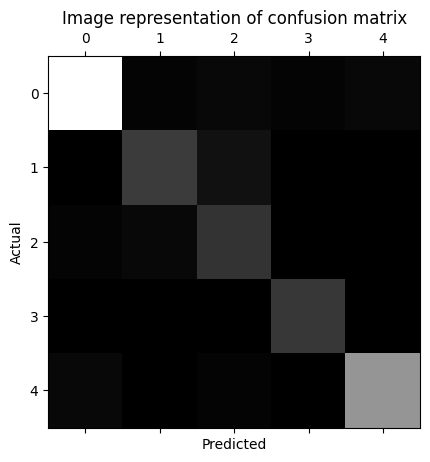

In [98]:
# Image representation of Confusion matrix
plt.matshow(confusion_matrix(y_train, y_train_pred), cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Image representation of confusion matrix')
plt.show()

Since most white images are on the main diagonal, confusion matrix looks pretty good i.e., the logistic regression model performed well on the training set. Intensity of white color changes with the number of each class present in the training set, e.g., 00 diagonal box is most white as it has most number 60 elements, next intense white box is 44 having 35 elements in it and so on.

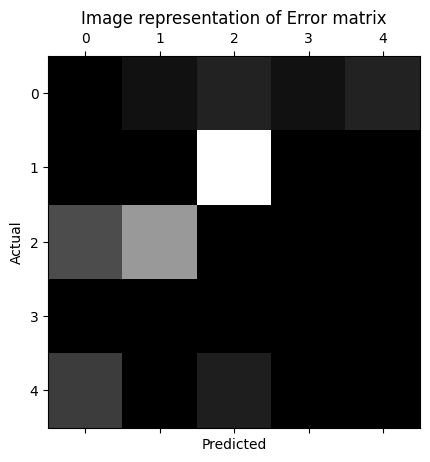

In [99]:
# Image representation of Error matrix
# First we divide each element in the confusion matrix by the number of images in the corresponding class (number of images are
# computed by sum over axis = 1) so that we can compare error rates instead of absolute number of errors (which would make abundant classes
# look unfairly bad).

conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)   # Fill the main diagonal elements with 0 to keep only the errors.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Image representation of Error matrix')
plt.show()

We can see that in the Error matrix, main diagonal elements are completely black as they are zero and don't have any errors. In the confusion matrix, the 12 box is more intense except the main diagonal boxes and in the error matrix 12 box become most intense as it has the most 4 elements. The intensity of other boxes reduces as the number of normalized error for those classes are lesser.

### Evaluation on test set

#### Confusion matrix and Accuracy score

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = log_reg_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The acuracy of classifiction = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[24  0  1  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The acuracy of classifiction =  0.98


Only one wrong prediction by logistic regression. Great!!

#### Print $y_{pred}$ and $y_{test}$

In [ ]:
# Print y_pred and y_test side by side
np.concatenate((np.reshape(y_pred, (len(y_pred), 1)), np.reshape(y_test, (len(y_test), 1))), axis = 1)

array([['drugC', 'drugC'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugA', 'drugA'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugB', 'drugB'],
       ['drugC', 'drugC'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugC', 'drugC'],
       ['drugA', 'drugA'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
 

## K-Nearest Neighbors (K-NN)

### Build and train the model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 30)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

### Evaluation on test set

#### Confusion matrix and Accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = KNN_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The acuracy of classifiction = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[22  0  1  0  2]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  2  1]

 [ 0  0  0  0 16]]

The acuracy of classifiction =  0.92


#### Variation of Accuracy score with no. of neighbors

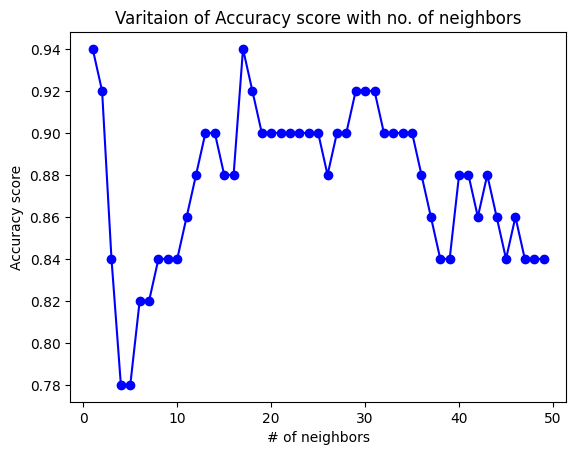

In [ ]:
acc_score_list = []
for i in range(1, 50):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i)
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    acc_score_list.append(accuracy_score(y_pred, y_test))

plt.plot(np.arange(1, 50), acc_score_list, '-o', color = 'b')
plt.xlabel('# of neighbors')
plt.ylabel('Accuracy score')
plt.title('Varitaion of Accuracy score with no. of neighbors')
plt.show()


The maximum accuracy with KNN classifier achieved is 0.94.

## Support vector machine (SVM) for classification or SVC
We will use `linear` and `rbf` kernels for support vector clasification.

### Build and train the model

In [ ]:
# With 'linear' kernel:
from sklearn.svm import SVC
svc_linear_classifier = SVC(kernel = 'linear', random_state = 0)
svc_linear_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# With 'rbf' kernel
from sklearn.svm import SVC
svc_rbf_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_rbf_classifier.fit(X_train, y_train)

SVC(random_state=0)

### Evaluation on test set

#### Confusion matrix and Accuracy score

In [ ]:
# With 'linear' kernel
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = svc_linear_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[24  0  1  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 1  0  0  0 15]]

The accuracy of classification =  0.96


In [ ]:
# With 'rbf' kernel
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = svc_rbf_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[24  0  1  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The accuracy of classification =  0.98


## Naive Bayes

### Build and train the model

In [100]:
from sklearn.naive_bayes import GaussianNB
gaussianNB_classifier = GaussianNB()
gaussianNB_classifier.fit(X_train, y_train)

GaussianNB()

### Cross validation

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=14.

  warnings.warn(


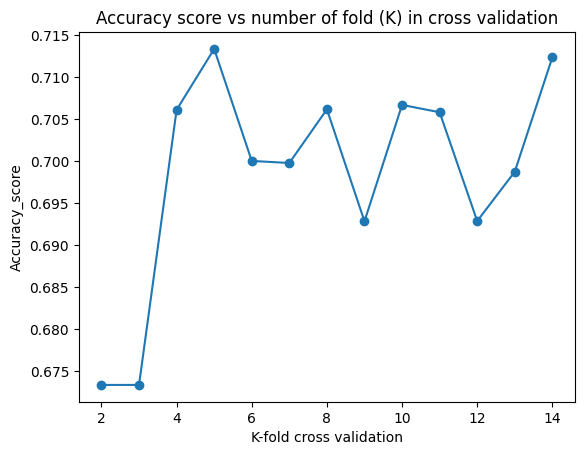

In [101]:
# Mean cross validation score vs number of folds in cross validation
from sklearn.model_selection import cross_val_score

mean_cv_score = []

for i in range(2, 15):
    cv_score = cross_val_score(gaussianNB_classifier, X_train, y_train, cv = i, scoring = 'accuracy')
    mean_cv_score.append(np.mean(cv_score))

plt.plot(range(2, 15), mean_cv_score, '-o')
plt.xlabel('K-fold cross validation')
plt.ylabel('Accuracy_score')
plt.title('Accuracy score vs number of fold (K) in cross validation')
plt.show()

#### Confusion matrix and Error matrix and their image reperentations
**Ref. of image presentations**: Aurelien Geron's book on Hands on Machine Learning.

In [104]:
# Cross validation predict and confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gaussianNB_classifier, X_train, y_train, cv = 5)
confusion_matrix(y_train, y_train_pred)

array([[25, 19,  3,  9, 10],
       [ 0, 17,  1,  0,  0],
       [ 0,  1, 14,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 38]])

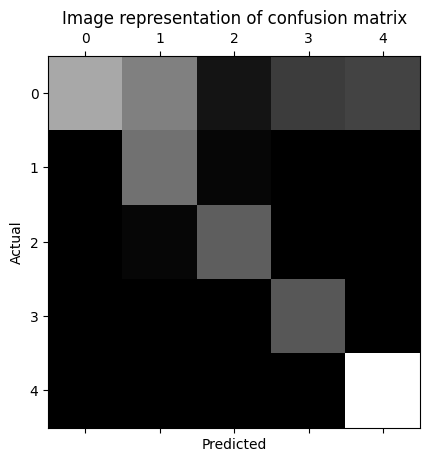

In [105]:
# Image representation of Confusion matrix
plt.matshow(confusion_matrix(y_train, y_train_pred), cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Image representation of confusion matrix')
plt.show()

Confusion matrix does not look good like it was in logistic regression model i.e., there are many off diagonal intense boxes present in the above image for Naive Bayes model. So, the Naive Bayes model did not perform well on the training set.  

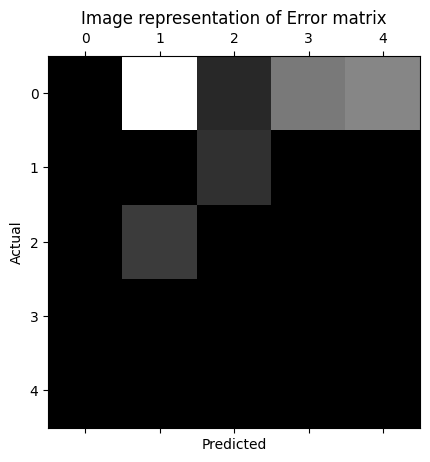

In [106]:
# Image representation of Error matrix
# First we divide each element in the confusion matrix by the number of images in the corresponding class (number of images are
# computed by sum over axis = 1) so that we can compare error rates instead of absolute number of errors (which would make abundant classes
# look unfairly bad).

conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)   # Fill the main diagonal elements with 0 to keep only the errors.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Image representation of Error matrix')
plt.show()

We see in the image representation of Error matrix that most errors are due to class-0 is wrongly classified as other classes and hence whitish boxes are mainly in the row-0. Also, class-2 is wrongly classified as class-1 and vice varsa. No others error are present in the error matrix.

### Evaluation on test set

#### Confusion matrix and Accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = gaussianNB_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[10  5  2  3  5]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The accuracy of classification =  0.7


#### Print $y_{pred}$ and $y_{test}$

In [ ]:
np.concatenate((np.reshape(y_pred, (len(y_pred), 1)), np.reshape(y_test, (len(y_test), 1))), axis = 1)

array([['drugC', 'drugC'],
       ['drugX', 'drugX'],
       ['drugC', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugC', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugA', 'drugA'],
       ['drugA', 'DrugY'],
       ['drugA', 'DrugY'],
       ['drugX', 'DrugY'],
       ['drugB', 'drugB'],
       ['drugC', 'drugC'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugA', 'DrugY'],
       ['drugA', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['drugX', 'DrugY'],
       ['drugX', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['DrugY', 'DrugY'],
       ['drugX', 'drugX'],
       ['drugX', 'drugX'],
       ['drugC', 'drugC'],
       ['drugA', 'drugA'],
       ['drugX', 'drugX'],
       ['DrugY', 'DrugY'],
       ['drugB', 'DrugY'],
       ['drugX', 'drugX'],
 

## Decision tree classification

### Build and train the model
We will use `criterion = 'gini' or 'entropy' or 'log_loss'`. The argument 'criterion' is the function to measure the quality of a split. DO NOT run as they are in the order as I used the same object name (`dt_classifier`) of `DecisionTreeClassifier` class, for all the 3 different criterion. So, run the **corresponding code cells** of each criterion. e.g., first run code cells of criterion = 'gini' from the subsection "Build and train the model" and "Evaluation on test set". Then run same for criterion = 'entropy' and so on.

In Support vector machine for classification section above, I have used different classifier names (`svc_linear_classifier` and `svc_rbf_classifier`). So in that section, there is no problem if one run the code cells as they are in the order. No need of running the corresponding code cells.

In [ ]:
# criterion = 'gini'
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# criterion = 'entropy'
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# criterion = 'log_loss'
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=0)

### Evaluation on test set

#### Confusion matrix and Accuracy score

In [ ]:
# criterion = 'gini'
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[25  0  0  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The accuracy of classification =  1.0


In [ ]:
# criterion = 'entropy'
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[25  0  0  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The accuracy of classification =  1.0


In [ ]:
# criterion = 'log_loss'
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = dt_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[25  0  0  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The accuracy of classification =  1.0


WOW! Decision tree classification model gives 100% accuracy (with all the 3 criterion)! Wonderful!

#### Histrogram plot of $y_{test}$ i.e., drugs on test set

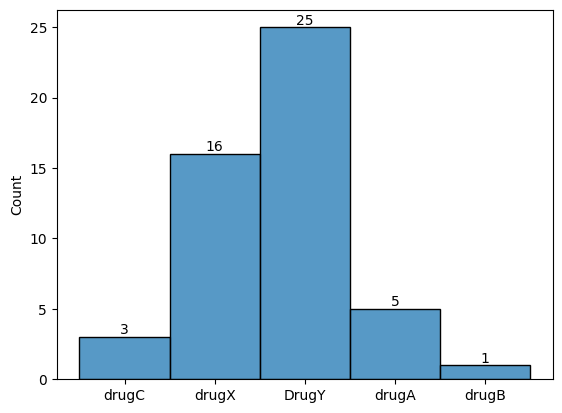

In [ ]:
ax = sns.histplot(y_test)
ax.bar_label(ax.containers[0]);   # This line add text labels with each bar’s total count or frequency.

We see from the confusion matrix of each criterion, there are no off-diagonal elements telling no wrong predictions by the decision tree classification model. The diagonal elements 25, 5, 1, 3, 16 correspond to number of drugs for each class in the test set.

## Random forest classification

### Build and train the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Evaluation on test set

#### Confusion matrix and Accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf_classifier.predict(X_test)
print('The confusion matrix is = \n', confusion_matrix(y_test, y_pred))
print('The accuracy of classification = ', accuracy_score(y_test, y_pred))

The confusion matrix is = 

 [[25  0  0  0  0]

 [ 0  5  0  0  0]

 [ 0  0  1  0  0]

 [ 0  0  0  3  0]

 [ 0  0  0  0 16]]

The accuracy of classification =  1.0


WOW! Random forest classification model gives 100% accuracy (I have checked with all the 3 criterion)! Wonderful!

#### Variation of Accuracy score with no. of trees in rhe forest

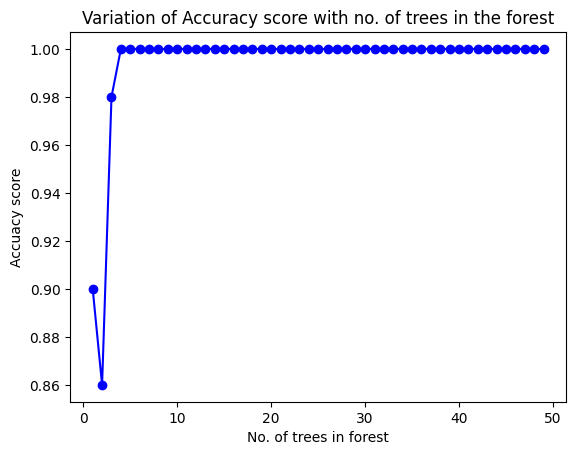

In [ ]:
acc_score_list = []
for i in range(1, 50):
    rf_classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    acc_score_list.append(accuracy_score(y_test, y_pred))

plt.plot(np.arange(1, 50), acc_score_list, '-o', color = 'b')
plt.xlabel('No. of trees in forest')
plt.ylabel('Accuacy score')
plt.title('Variation of Accuracy score with no. of trees in the forest')
plt.show()

# Tabulate Accuracy of classification for different ML models used

In [ ]:
accuracy_vs_model_dict = {'ML_model': ['Logistic regression', 'K-Nearest Neighbors (KNN)', 'KNN max', 'Support vector classification (linear kernel)', 'Support vector classification (rbf kernel)', 'Naive Bayes', 'Decision tree classification', 'Random forest classification'],
                          'Accuracy_score': [0.98, 0.92, 0.94, 0.96, 0.98, 0.7, 1.0, 1.0]}

pd.DataFrame(accuracy_vs_model_dict)

,ML_model,Accuracy_score
0,Logistic regression,0.98
1,K-Nearest Neighbors (KNN),0.92
2,KNN max,0.94
3,Support vector classification (linear kernel),0.96
4,Support vector classification (rbf kernel),0.98
5,Naive Bayes,0.70
6,Decision tree classification,1.00
7,Random forest classification,1.00


So, we see that decision tree classification and random forest classification models give the best accuracy and that is too 100%!! Great!